In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv
%matplotlib inline 

In [2]:
path=r"C:\Users\vidya\Downloads\Aerial Images of Cities\Cityscape Dataset" # data location show

In [3]:
dis=os.listdir(path)  # all features show
dis

['Bridge',
 'Commercial',
 'Industrial',
 'Intersection',
 'Landmark',
 'Park',
 'Parking',
 'Playground',
 'Residential',
 'Stadium']

In [4]:
dis.index("Playground")   # this features name index number show

7

In [5]:
Data=[]
for i in dis:                  # all folders inside parents path show
    A=os.path.join(path,i)     # join the path i after
    for j in os.listdir(A):    # getting all conent from folder
        B=os.path.join(A,j)     # join 
        img=cv.imread(B)        # convert image to pixel intensity
        C=cv.resize(img,(50,50)) #  resize the pixel intensity
        T=dis.index(i)           # getting all target variable
        Data.append([C,T])       # store values in this variable

In [6]:
i=cv.imread(r"C:\Users\vidya\Downloads\Aerial Images of Cities\Cityscape Dataset\Stadium\015.jpg") 
#any features inside the one image path show

In [7]:
i.shape   #i.e image is 256 pixel height & width show and 3 is color channel. i.e RGB

(256, 256, 3)

In [8]:
Data[0] # indexing start from 0 images show

[array([[[37, 39, 27],
         [37, 39, 27],
         [37, 39, 27],
         ...,
         [59, 60, 64],
         [65, 73, 76],
         [49, 64, 66]],
 
        [[37, 39, 27],
         [37, 39, 27],
         [37, 39, 27],
         ...,
         [52, 60, 63],
         [52, 64, 66],
         [60, 73, 75]],
 
        [[37, 39, 27],
         [37, 39, 27],
         [37, 39, 27],
         ...,
         [33, 46, 48],
         [52, 65, 67],
         [50, 62, 64]],
 
        ...,
 
        [[21, 24, 28],
         [19, 22, 26],
         [40, 43, 47],
         ...,
         [35, 40, 25],
         [35, 40, 25],
         [35, 40, 25]],
 
        [[43, 50, 53],
         [44, 50, 53],
         [22, 29, 32],
         ...,
         [33, 38, 23],
         [32, 37, 22],
         [34, 39, 24]],
 
        [[45, 54, 57],
         [30, 39, 42],
         [37, 46, 49],
         ...,
         [35, 40, 25],
         [34, 39, 24],
         [35, 40, 25]]], dtype=uint8),
 0]

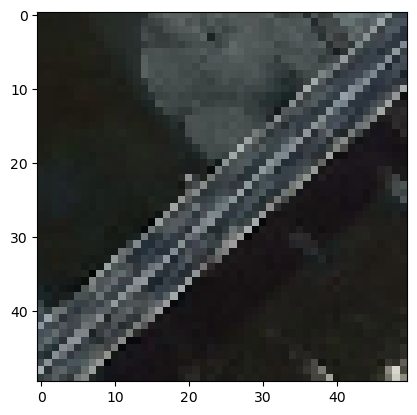

In [9]:
plt.imshow(Data[4][0]) # 4 index number image seen in 0 target

In [10]:
len(Data) # get the number of element in Data

8000

In [11]:
len(Data[1][0]) 

50

In [12]:
Data[100][1]

0

In [13]:
import random
random.shuffle(Data)

In [14]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)
    

In [15]:
F

[array([[[133, 127, 114],
         [149, 140, 131],
         [120, 108,  96],
         ...,
         [120, 111,  74],
         [117, 108,  70],
         [118, 109,  71]],
 
        [[204, 200, 182],
         [129, 120, 110],
         [135, 124, 109],
         ...,
         [120, 112,  72],
         [119, 112,  71],
         [117, 109,  69]],
 
        [[195, 191, 172],
         [118, 110,  97],
         [116, 106,  89],
         ...,
         [119, 113,  68],
         [119, 113,  68],
         [120, 114,  69]],
 
        ...,
 
        [[ 99,  74,  48],
         [ 96,  71,  45],
         [ 93,  68,  42],
         ...,
         [ 87,  72,  72],
         [139, 128, 136],
         [166, 155, 173]],
 
        [[ 76,  58,  35],
         [ 91,  73,  50],
         [ 98,  79,  56],
         ...,
         [ 98,  91,  82],
         [197, 188, 192],
         [ 86,  75,  92]],
 
        [[141, 128, 106],
         [102,  89,  67],
         [114, 101,  79],
         ...,
         [118, 106,  99],
  

In [16]:
len(F)

8000

In [17]:
len(T)

8000

In [18]:
T

[0,
 8,
 0,
 8,
 5,
 1,
 9,
 1,
 4,
 1,
 9,
 1,
 8,
 9,
 9,
 8,
 5,
 0,
 5,
 1,
 5,
 2,
 9,
 3,
 1,
 3,
 2,
 0,
 5,
 0,
 9,
 5,
 3,
 0,
 6,
 8,
 6,
 8,
 1,
 2,
 1,
 9,
 6,
 3,
 6,
 6,
 9,
 5,
 2,
 4,
 9,
 8,
 9,
 0,
 0,
 7,
 8,
 8,
 7,
 9,
 9,
 4,
 4,
 7,
 7,
 1,
 3,
 6,
 6,
 1,
 0,
 2,
 5,
 3,
 8,
 3,
 6,
 7,
 9,
 3,
 5,
 5,
 0,
 2,
 8,
 8,
 1,
 8,
 4,
 3,
 6,
 0,
 9,
 1,
 6,
 6,
 2,
 1,
 7,
 7,
 5,
 5,
 5,
 2,
 2,
 5,
 9,
 4,
 6,
 7,
 4,
 8,
 7,
 9,
 4,
 7,
 1,
 0,
 0,
 5,
 7,
 7,
 9,
 5,
 5,
 9,
 7,
 4,
 2,
 4,
 1,
 7,
 2,
 2,
 7,
 9,
 9,
 0,
 9,
 2,
 4,
 2,
 2,
 5,
 1,
 0,
 2,
 7,
 2,
 4,
 8,
 5,
 0,
 7,
 8,
 0,
 8,
 0,
 2,
 1,
 2,
 3,
 4,
 2,
 5,
 5,
 6,
 5,
 2,
 2,
 6,
 2,
 4,
 0,
 6,
 7,
 8,
 0,
 9,
 5,
 9,
 2,
 4,
 9,
 1,
 4,
 3,
 0,
 2,
 3,
 1,
 3,
 6,
 0,
 1,
 4,
 0,
 6,
 3,
 5,
 2,
 7,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 1,
 3,
 7,
 7,
 1,
 0,
 5,
 2,
 5,
 3,
 7,
 2,
 7,
 8,
 9,
 3,
 2,
 0,
 9,
 3,
 5,
 4,
 6,
 6,
 3,
 2,
 4,
 4,
 6,
 9,
 1,
 1,
 4,
 0,
 4,
 6,
 7,
 8,
 0,
 6,
 0,


In [19]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

C:\Users\vidya\AppData\Local\Temp\ipykernel_3692\3722759232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,1
7996,0,0,0,1,0,0,0,0,0,0
7997,0,0,0,0,0,1,0,0,0,0
7998,0,0,0,0,0,0,0,0,1,0


In [20]:
F=np.array(F)

In [21]:
T2=np.array(T1)

In [22]:
T2

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [23]:
F1=F/255.

In [24]:
F

array([[[[133, 127, 114],
         [149, 140, 131],
         [120, 108,  96],
         ...,
         [120, 111,  74],
         [117, 108,  70],
         [118, 109,  71]],

        [[204, 200, 182],
         [129, 120, 110],
         [135, 124, 109],
         ...,
         [120, 112,  72],
         [119, 112,  71],
         [117, 109,  69]],

        [[195, 191, 172],
         [118, 110,  97],
         [116, 106,  89],
         ...,
         [119, 113,  68],
         [119, 113,  68],
         [120, 114,  69]],

        ...,

        [[ 99,  74,  48],
         [ 96,  71,  45],
         [ 93,  68,  42],
         ...,
         [ 87,  72,  72],
         [139, 128, 136],
         [166, 155, 173]],

        [[ 76,  58,  35],
         [ 91,  73,  50],
         [ 98,  79,  56],
         ...,
         [ 98,  91,  82],
         [197, 188, 192],
         [ 86,  75,  92]],

        [[141, 128, 106],
         [102,  89,  67],
         [114, 101,  79],
         ...,
         [118, 106,  99],
        

In [25]:
F1.shape

(8000, 50, 50, 3)

# TRANSFER lEARNING
# VGG16 MODEL

In [27]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [28]:
vgg=VGG16(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

In [29]:
for i in vgg.layers:
    i.trainable=False

In [30]:
x=Flatten()(vgg.output)

In [31]:
z=Dense(10,activation='softmax')(x)

In [32]:
model=Model(vgg.input,z)

In [33]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
T1

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,1
7996,0,0,0,1,0,0,0,0,0,0
7997,0,0,0,0,0,1,0,0,0,0
7998,0,0,0,0,0,0,0,0,1,0


In [35]:
T2

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [36]:
model.fit(F1,T2,epochs=1,validation_split=0.1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.3050 - loss: 2.0556 - val_accuracy: 0.5300 - val_loss: 1.4705


## VGG19 model

In [38]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Sequential

In [39]:
vgg=VGG19(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

In [40]:
for i in vgg.layers:
    i.trainable=False

In [41]:
x=Flatten()(vgg.output)

In [42]:
model=Model(vgg.input,z)

In [43]:
z=Dense(10,activation='softmax')(x)

In [44]:
model=Model(vgg.input,z)

In [45]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
model.fit(F1,T2,epochs=1,validation_split=0.1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 608s 3s/step - accuracy: 0.3393 - loss: 1.9512 - val_accuracy: 0.5400 - val_loss: 1.4253


# Resnet model

In [48]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Sequential

In [49]:
vgg=ResNet50(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

In [50]:
for i in vgg.layers:
    i.trainable=False

In [51]:
x=Flatten()(vgg.output)

In [52]:
z=Dense(10,activation='softmax')(x)

model=Model(vgg.input,z)

In [54]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [55]:
model.fit(F1,T2,epochs=1,validation_split=0.1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.5470 - loss: 1.3921 - val_accuracy: 0.5950 - val_loss: 1.2522


# MobileNet Model

In [57]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.models import Sequential

In [58]:
vgg=MobileNet(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

C:\Users\vidya\AppData\Local\Temp\ipykernel_3692\108686436.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  vgg=MobileNet(input_shape=[50,50,3],


In [59]:
for i in vgg.layers:
    i.trainable=False

In [60]:
x=Flatten()(vgg.output)

In [61]:
z=Dense(10,activation='softmax')(x)

In [62]:
model=Model(vgg.input,z)

In [63]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [64]:
model.fit(F1,T2,epochs=1,validation_split=0.1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.1288 - loss: 2.2980 - val_accuracy: 0.2087 - val_loss: 2.2528


# Densenet model

In [66]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.models import Sequential

In [67]:
vgg=DenseNet121(input_shape=[50,50,3],
         weights='imagenet',
         include_top=False)

In [68]:
for i in vgg.layers:
    i.trainable=False

In [69]:
x=Flatten()(vgg.output)

In [70]:
z=Dense(10,activation='softmax')(x)

In [71]:
model=Model(vgg.input,z)

In [72]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [73]:
model.fit(F1,T2, epochs=1, validation_split=0.1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 124s 371ms/step - accuracy: 0.3609 - loss: 1.8413 - val_accuracy: 0.6100 - val_loss: 1.1940


# CNN model

In [243]:
model=Sequential()
#DATA AUGMENTATION
model.add(layers.RandomFlip('horizontal'))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.RandomContrast(0.1))



## CNN  code
model.add(  Conv2D( 50,   (5,5),  activation='relu')  )
model.add(  MaxPooling2D(  (2,2)  ,strides=(1,1)))

model.add(Conv2D(50,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(50,input_shape=(50,50,),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))



C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [77]:
model.fit(F1,T2, epochs=1, validation_split=0.3)

175/175 ━━━━━━━━━━━━━━━━━━━━ 119s 643ms/step - accuracy: 0.1112 - loss: 2.2964 - val_accuracy: 0.2342 - val_loss: 2.1867


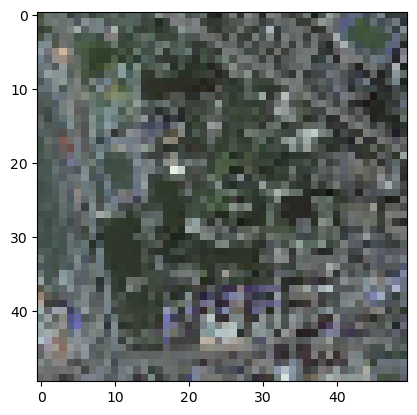

In [78]:
plt.imshow(Data[4][0]) # to check the pixel Flip,Contars,Rotatio,Zoom

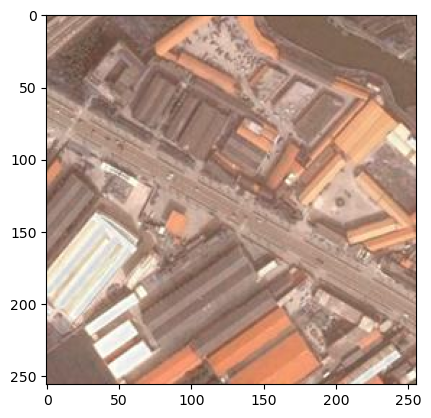

In [79]:
img_path = r"C:\Users\vidya\Downloads\Aerial Images of Cities\Cityscape Dataset\Industrial\010.jpg"
img = cv.imread(img_path,)

img_resized = cv.resize(img, (50, 50))
img_resized=img_resized.reshape(1, 50, 50, 3)

plt.imshow(img,)
plt.show()

In [80]:
prediction = model.predict(img_resized)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
dis[2]

'Industrial'

In [82]:
p1=r"C:\Users\vidya\Downloads\Aerial Images of Cities\Cityscape Dataset"


In [83]:
Data1=[]
for i in dis:
    A=os.path.join(p1,i) 
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(50,50))
        T=dis.index(i) 
        Data1.append([C,T]) 

In [84]:
import random
random.shuffle(Data1)

In [85]:
Data1[1]

[array([[[ 66,  71,  70],
         [ 71,  76,  75],
         [ 68,  73,  72],
         ...,
         [ 45,  53,  52],
         [ 64,  71,  70],
         [ 57,  64,  63]],
 
        [[ 67,  72,  71],
         [ 65,  70,  69],
         [ 65,  70,  69],
         ...,
         [ 57,  63,  62],
         [ 60,  66,  65],
         [ 53,  59,  58]],
 
        [[ 64,  69,  69],
         [ 66,  71,  70],
         [ 64,  69,  68],
         ...,
         [ 65,  75,  73],
         [ 74,  83,  81],
         [116, 126, 124]],
 
        ...,
 
        [[ 79,  82,  82],
         [ 66,  66,  66],
         [ 68,  65,  65],
         ...,
         [ 60,  68,  68],
         [ 61,  66,  67],
         [ 45,  47,  48]],
 
        [[ 69,  71,  71],
         [ 70,  70,  70],
         [ 70,  69,  69],
         ...,
         [ 16,  21,  20],
         [ 87,  89,  89],
         [ 80,  78,  78]],
 
        [[ 68,  70,  70],
         [ 64,  64,  64],
         [ 63,  61,  61],
         ...,
         [ 27,  30,  28],
  

In [86]:
F1=[]
T1=[]
for i,j in Data1:
    F1.append(i)
    T1.append(j)

In [87]:
T1

[2,
 6,
 1,
 3,
 5,
 2,
 5,
 3,
 6,
 2,
 7,
 4,
 2,
 7,
 2,
 4,
 7,
 3,
 0,
 0,
 2,
 3,
 1,
 0,
 9,
 3,
 3,
 8,
 8,
 5,
 0,
 9,
 5,
 5,
 7,
 7,
 2,
 9,
 8,
 7,
 9,
 6,
 6,
 4,
 7,
 6,
 4,
 7,
 0,
 2,
 8,
 8,
 5,
 3,
 5,
 7,
 9,
 9,
 5,
 4,
 4,
 2,
 3,
 7,
 1,
 1,
 4,
 3,
 3,
 6,
 4,
 1,
 8,
 2,
 7,
 5,
 0,
 2,
 0,
 1,
 5,
 6,
 7,
 5,
 8,
 6,
 2,
 0,
 5,
 8,
 4,
 0,
 7,
 3,
 9,
 7,
 9,
 5,
 7,
 3,
 0,
 8,
 4,
 5,
 1,
 3,
 5,
 3,
 9,
 5,
 8,
 3,
 3,
 7,
 6,
 6,
 3,
 8,
 0,
 8,
 8,
 4,
 9,
 1,
 6,
 7,
 1,
 7,
 9,
 1,
 2,
 8,
 6,
 0,
 1,
 4,
 0,
 4,
 4,
 2,
 6,
 4,
 0,
 7,
 9,
 4,
 4,
 8,
 8,
 9,
 3,
 6,
 4,
 9,
 5,
 0,
 6,
 2,
 1,
 1,
 1,
 9,
 0,
 6,
 2,
 9,
 5,
 6,
 8,
 2,
 0,
 2,
 5,
 0,
 3,
 0,
 5,
 0,
 4,
 8,
 1,
 6,
 6,
 6,
 4,
 6,
 5,
 4,
 7,
 2,
 7,
 1,
 2,
 3,
 1,
 8,
 8,
 9,
 3,
 3,
 0,
 1,
 3,
 6,
 9,
 5,
 8,
 7,
 6,
 7,
 3,
 7,
 0,
 5,
 2,
 7,
 5,
 0,
 6,
 5,
 4,
 1,
 4,
 2,
 2,
 2,
 4,
 4,
 2,
 3,
 0,
 2,
 0,
 1,
 9,
 4,
 5,
 1,
 6,
 5,
 1,
 6,
 1,
 7,
 1,
 8,
 2,
 1,
 7,
 1,


In [88]:
F1=np.array(F1)
F1=F1/255. 

In [89]:
pred=model.predict(F1)
pred

250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step


array([[0.00649748, 0.15803318, 0.23830314, ..., 0.00630463, 0.17652997,
        0.16964035],
       [0.04223982, 0.1461502 , 0.11063819, ..., 0.05903564, 0.1731381 ,
        0.12453812],
       [0.01622679, 0.17701027, 0.12048673, ..., 0.03227131, 0.19541392,
        0.14950019],
       ...,
       [0.05106022, 0.12528238, 0.1395865 , ..., 0.0508222 , 0.16411403,
        0.11677603],
       [0.03956591, 0.15580215, 0.10043394, ..., 0.06627312, 0.16838981,
        0.12142999],
       [0.05983012, 0.11671197, 0.10309474, ..., 0.09109735, 0.13967842,
        0.12952712]], dtype=float32)

In [229]:
pred1=[]
for i in pred:
    pred1.append(np.argmax(i))

In [231]:
pred1

[2,
 8,
 8,
 8,
 7,
 2,
 7,
 8,
 8,
 2,
 7,
 8,
 2,
 8,
 9,
 8,
 9,
 8,
 9,
 7,
 2,
 8,
 8,
 7,
 8,
 8,
 7,
 8,
 8,
 7,
 9,
 2,
 7,
 7,
 7,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 8,
 9,
 7,
 8,
 8,
 8,
 7,
 8,
 7,
 7,
 2,
 9,
 7,
 9,
 1,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 2,
 7,
 8,
 1,
 2,
 8,
 8,
 7,
 8,
 7,
 1,
 8,
 8,
 8,
 7,
 7,
 8,
 2,
 2,
 8,
 8,
 8,
 7,
 6,
 9,
 9,
 8,
 7,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 2,
 8,
 9,
 8,
 8,
 8,
 8,
 7,
 8,
 8,
 8,
 1,
 8,
 8,
 8,
 2,
 7,
 8,
 2,
 2,
 8,
 2,
 8,
 7,
 9,
 8,
 8,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 7,
 8,
 8,
 2,
 8,
 8,
 8,
 8,
 9,
 1,
 2,
 9,
 8,
 8,
 8,
 2,
 8,
 2,
 7,
 7,
 8,
 8,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 7,
 1,
 7,
 8,
 8,
 8,
 2,
 8,
 1,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 8,
 8,
 8,
 7,
 8,
 8,
 8,
 7,
 8,
 7,
 7,
 7,
 2,
 7,
 8,
 7,
 8,
 9,
 8,
 8,
 8,
 2,
 9,
 8,
 2,
 8,
 2,
 8,
 8,
 2,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 7,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 8,
 9,
 8,


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [93]:
confusion_matrix(T1,pred1)

array([[  0,   4,  49,   0,   0,   2,  28, 233, 408,  76],
       [  0,  53,  81,   0,   0,   0,   0,  11, 628,  27],
       [  0,  13, 459,   0,   0,   0,   0,   1, 238,  89],
       [  0,  12,  18,   0,   0,   0,   7,  26, 661,  76],
       [  0,  27, 133,   0,   0,   0,   1,  15, 600,  24],
       [  0,  15,  13,   0,   0,   1,  34, 360, 309,  68],
       [  0,  33, 116,   0,   0,   0,   0,   8, 600,  43],
       [  0,  12,   7,   0,   0,   2,  27, 313, 306, 133],
       [  0,  41,  18,   0,   0,   0,   2,   3, 725,  11],
       [  0,  14, 162,   0,   0,   0,  14,   7, 278, 325]], dtype=int64)

In [94]:
print(classification_report(T1,pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       800
           1       0.24      0.07      0.10       800
           2       0.43      0.57      0.49       800
           3       0.00      0.00      0.00       800
           4       0.00      0.00      0.00       800
           5       0.20      0.00      0.00       800
           6       0.00      0.00      0.00       800
           7       0.32      0.39      0.35       800
           8       0.15      0.91      0.26       800
           9       0.37      0.41      0.39       800

    accuracy                           0.23      8000
   macro avg       0.17      0.23      0.16      8000
weighted avg       0.17      0.23      0.16      8000



C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
accuracy_score(T1,pred1)*100


23.45

In [96]:
a={"models":["VGG16","VGG19","ResNet","MobileNet","DenseNet","CNN"],"Train":[0.3101,0.3183,0.5477,0.1146,0.3659,0.1683],
   "Validation":[0.5263,0.5525,0.5925,0.1637,0.5925,0.2979]}

In [97]:
a=pd.DataFrame(a)
a

,models,Train,Validation
0,VGG16,0.3101,0.5263
1,VGG19,0.3183,0.5525
2,ResNet,0.5477,0.5925
3,MobileNet,0.1146,0.1637
4,DenseNet,0.3659,0.5925
5,CNN,0.1683,0.2979


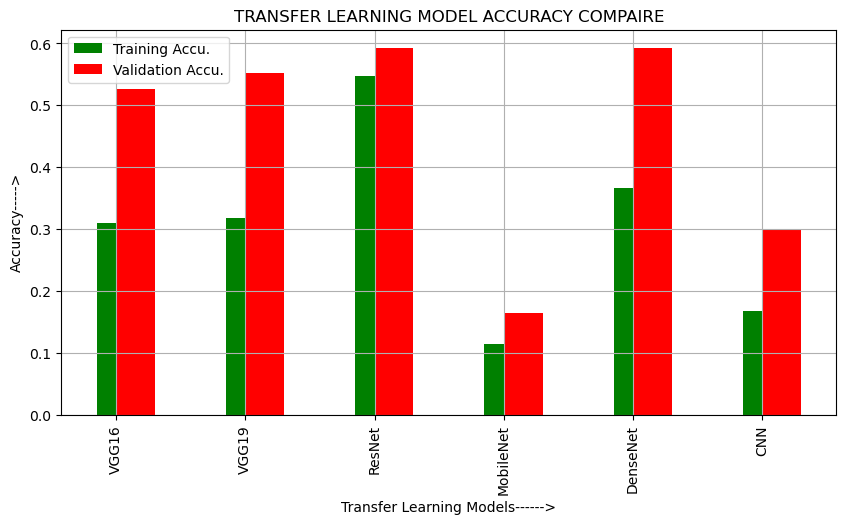

In [98]:
plt.figure(figsize=(10,5))
plt.bar(a["models"],a["Train"],color="g",width=0.3,align="center",label="Training Accu.")
plt.bar(a["models"],a["Validation"],color="r",width=0.3,align="edge",label="Validation Accu.")
plt.xlabel("Transfer Learning Models------>")
plt.ylabel("Accuracy----->")
plt.title("TRANSFER LEARNING MODEL ACCURACY COMPAIRE")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

FROM THE ABOVE BAR CHART IT IS CLEAR THAT the ResNet model of transfer learning. IS BEST FOR CLASSIFICATION FOR THIS DATASET WITH 
53% ACCURACY OF TRAINING DATA AND  VALIDATION ACCURACY IS 55%.